In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
import random


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [1]:
!pip install --upgrade --force-reinstall numpy pandas matplotlib networkx


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
import random


In [3]:
# Create dummy dataset
data = {
    "age": [random.randint(13, 60) for _ in range(100)],
    "dob_year": [random.randint(1960, 2010) for _ in range(100)]
}

# Save and reload as simulation of real workflow
df = pd.DataFrame(data)
df.to_csv("pseudo_facebook.csv", index=False)
files.download("pseudo_facebook.csv")

# Load dataset
df = pd.read_csv("pseudo_facebook.csv")
df.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,age,dob_year
0,15,1983
1,21,1970
2,36,1964
3,32,1992
4,30,1962


Total Nodes: 87
Total Edges: 99


<ipython-input-4-5c8bab0c794a>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


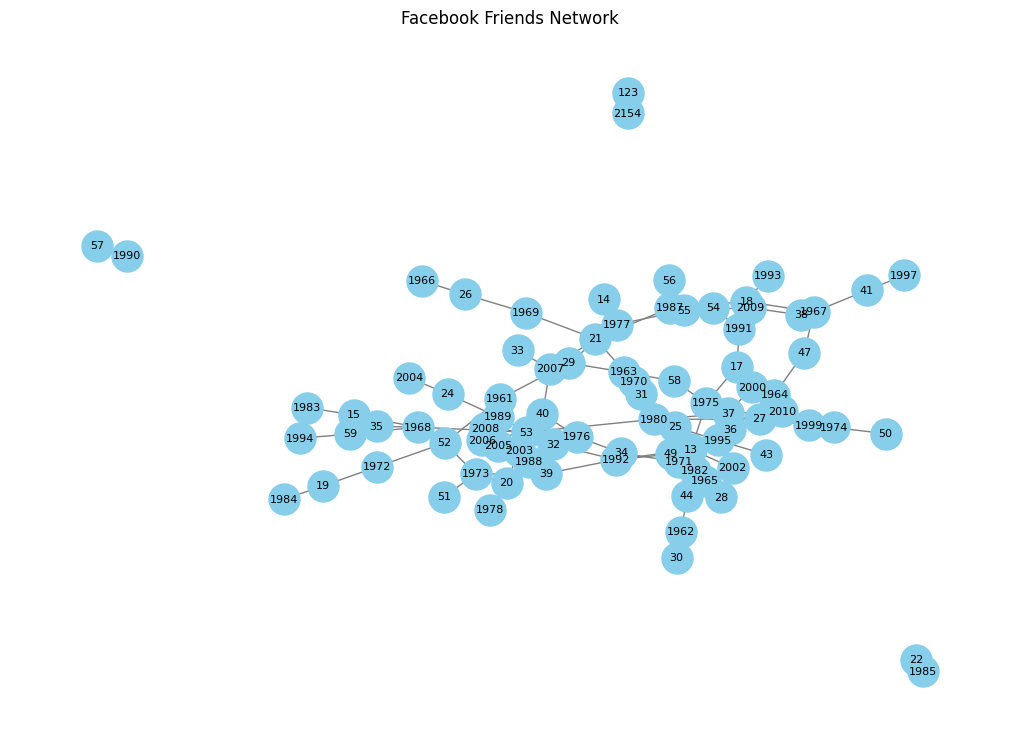

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Create graph
fb_graph = nx.from_pandas_edgelist(df, source="age", target="dob_year")

# Add extra edge
fb_graph.add_edge("123", "2154")

# Show graph info
print("Total Nodes:", len(fb_graph.nodes()))
print("Total Edges:", len(fb_graph.edges()))

# Draw and save graph
plt.figure(figsize=(10, 7))
nx.draw(fb_graph, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=8)
plt.title("Facebook Friends Network")
plt.tight_layout()
plt.savefig("fb_network.png")
plt.show()
files.download("fb_network.png")


In [5]:
degree_centrality = nx.degree_centrality(fb_graph)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 by Degree Centrality:")
for node, score in top_degree:
    print(f"Node: {node}, Centrality: {score:.4f}")

# Save to CSV
pd.DataFrame(top_degree, columns=["Node", "Degree_Centrality"]).to_csv("top_degree.csv", index=False)
files.download("top_degree.csv")



Top 5 by Degree Centrality:
Node: 53, Centrality: 0.0698
Node: 1987, Centrality: 0.0581
Node: 1980, Centrality: 0.0581
Node: 21, Centrality: 0.0465
Node: 32, Centrality: 0.0465


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
closeness_centrality = nx.closeness_centrality(fb_graph)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 by Closeness Centrality:")
for node, score in top_closeness:
    print(f"Node: {node}, Closeness: {score:.4f}")

# Save to CSV
pd.DataFrame(top_closeness, columns=["Node", "Closeness_Centrality"]).to_csv("top_closeness.csv", index=False)
files.download("top_closeness.csv")



Top 5 by Closeness Centrality:
Node: 1980, Closeness: 0.2489
Node: 53, Closeness: 0.2340
Node: 25, Closeness: 0.2340
Node: 21, Closeness: 0.2228
Node: 1970, Closeness: 0.2195


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
if nx.has_bridges(fb_graph):
    bridges = list(nx.bridges(fb_graph))
    print(f"\nBridges Found: {len(bridges)}")
    for b in bridges:
        print(f"Bridge: {b}")
    pd.DataFrame(bridges, columns=["Node1", "Node2"]).to_csv("bridges.csv", index=False)
    files.download("bridges.csv")
else:
    print("\nNo bridges found in the network.")



Bridges Found: 40
Bridge: (15, 1983)
Bridge: (15, 1968)
Bridge: (21, 1969)
Bridge: (32, 1989)
Bridge: (30, 1962)
Bridge: (1962, 44)
Bridge: (18, 1993)
Bridge: (1987, 56)
Bridge: (55, 2009)
Bridge: (59, 1994)
Bridge: (59, 1968)
Bridge: (41, 1967)
Bridge: (41, 1997)
Bridge: (37, 2010)
Bridge: (14, 1977)
Bridge: (20, 1978)
Bridge: (1968, 53)
Bridge: (1968, 35)
Bridge: (53, 2005)
Bridge: (53, 2006)
Bridge: (53, 2008)
Bridge: (38, 2009)
Bridge: (1982, 28)
Bridge: (13, 2002)
Bridge: (2007, 33)
Bridge: (1989, 24)
Bridge: (27, 1974)
Bridge: (27, 1999)
Bridge: (24, 2004)
Bridge: (1974, 50)
Bridge: (51, 1973)
Bridge: (1995, 43)
Bridge: (52, 1972)
Bridge: (1972, 19)
Bridge: (1969, 26)
Bridge: (19, 1984)
Bridge: (57, 1990)
Bridge: (26, 1966)
Bridge: (22, 1985)
Bridge: ('123', '2154')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
clustering = nx.average_clustering(fb_graph)
print(f"\nAverage Clustering Coefficient: {clustering:.4f}")

with open("clustering_summary.txt", "w") as f:
    f.write(f"Average Clustering Coefficient: {clustering:.4f}\n")
files.download("clustering_summary.txt")



Average Clustering Coefficient: 0.0000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>